#Installationsanleitung
#Bei der Verwendung von Anaconda kann NumPy wie folgt installiert werden. Im Anaconda Navigator -> Environments -> base(root) Klick auf den Pfeil -> Open Terminal. Dann folgendes eingeben:

#pip install numpy
#pip install plotly==5.4.0
#pip install jupyter-dash

#Anstelle pip können Sie auch conda nutzen conda install numpy

#Bitte installieren auch schon folgende Bibliotheken, die wir später benötigen werden

#conda install pandas  
#conda install matplotlib

In [170]:
# General Packages

import pandas as pd
import numpy as np

# Visualization packages

import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib import cm
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

import dash
from dash import dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Preprocessing
from sklearn import preprocessing


In [192]:
# import raw dataset
df_start = pd.read_csv("./data/raw.csv")

# delete redundant/non unuique values
df_start.pop("EmployeeCount")
df_start.pop("StandardHours")
df_start.pop("EmployeeNumber")


#show values
df_start.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


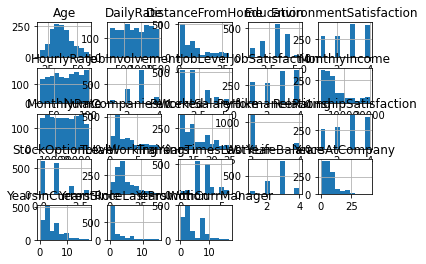

In [172]:
df_start.hist()
plt.show()

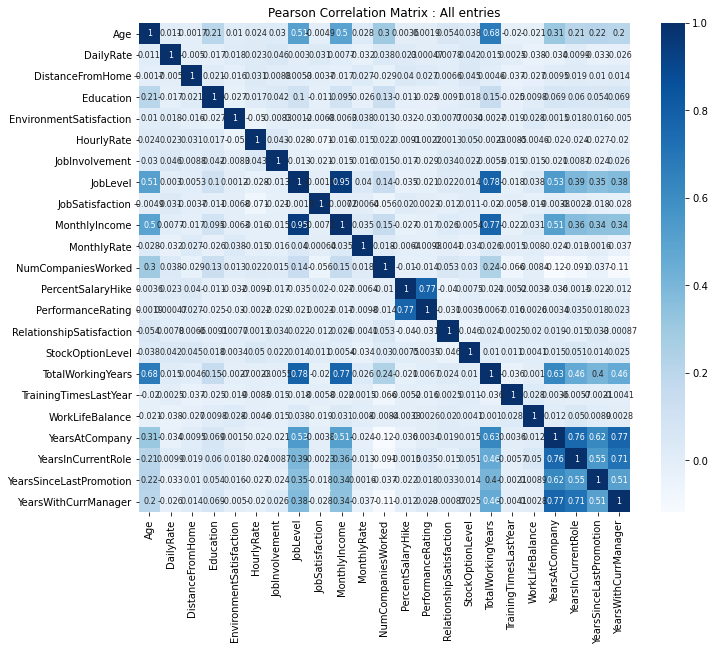

In [173]:
# Plot Pearson correlation matrix for all entries
fig_1 = plt.figure(figsize=(11, 9)) 
correlations = df_start.corr() 

sns.heatmap(correlations, annot=True, cmap='Blues', annot_kws={'size': 8}) 
plt.title('Pearson Correlation Matrix : All entries') 
plt.show()

In [174]:
Attrition = df_start.groupby('Attrition')
Attrition.mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [175]:
Attrition.describe()

Age                                                   DailyRate  \
            count       mean      std   min   25%   50%   75%   max     count   
Attrition                                                                       
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0    1233.0   
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0     237.0   

                       ... YearsSinceLastPromotion       YearsWithCurrManager  \
                 mean  ...                     75%   max                count   
Attrition              ...                                                      
No         812.504461  ...                     3.0  15.0               1233.0   
Yes        750.362869  ...                     2.0  15.0                237.0   

                                                         
               mean       std  min  25%  50%  75%   max  
Attrition                                                
No         4.367397  3.594116  0.0  2.0  3.0  7.0  17.0  
Yes        2.852321  3.143349  0.0  0.0  2.0  5.0  14.0  

[2 rows x 184 columns]

In [176]:
df_Attrition_Yes = df_start[df_start['Attrition']=="Yes"]
df_Attrition_Yes.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,...,3,2,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,...,4,2,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,...,3,3,0,8,2,3,4,2,1,3


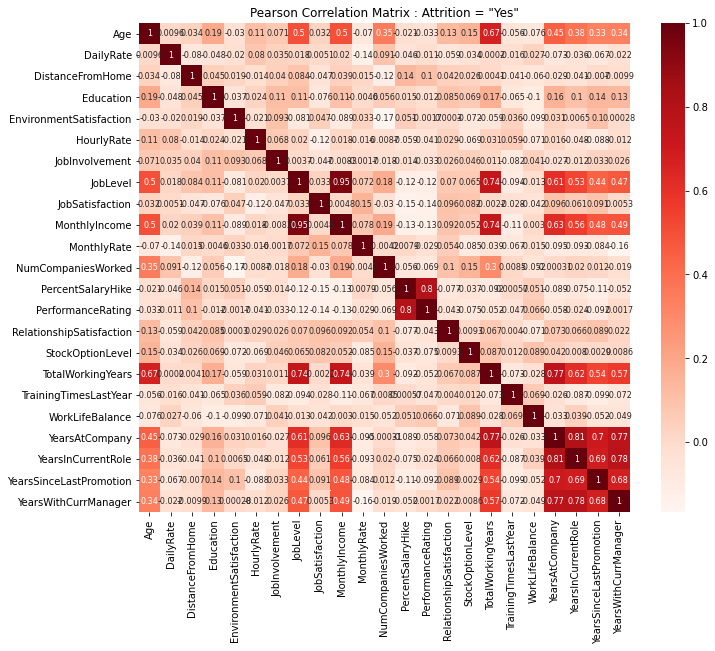

In [177]:
# Plot Pearson correlation matrix for Attrition = "Yes"
fig_1 = plt.figure(figsize=(11, 9)) 
correlations = df_Attrition_Yes.corr() 

sns.heatmap(correlations, annot=True, cmap='Reds', annot_kws={'size': 8}) 
plt.title('Pearson Correlation Matrix : Attrition = "Yes"') 
plt.show()

In [178]:
df_Attrition_No = df_start[df_start['Attrition']=="No"]
df_Attrition_No.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,4,1,3,12,3,2,1,0,0,0


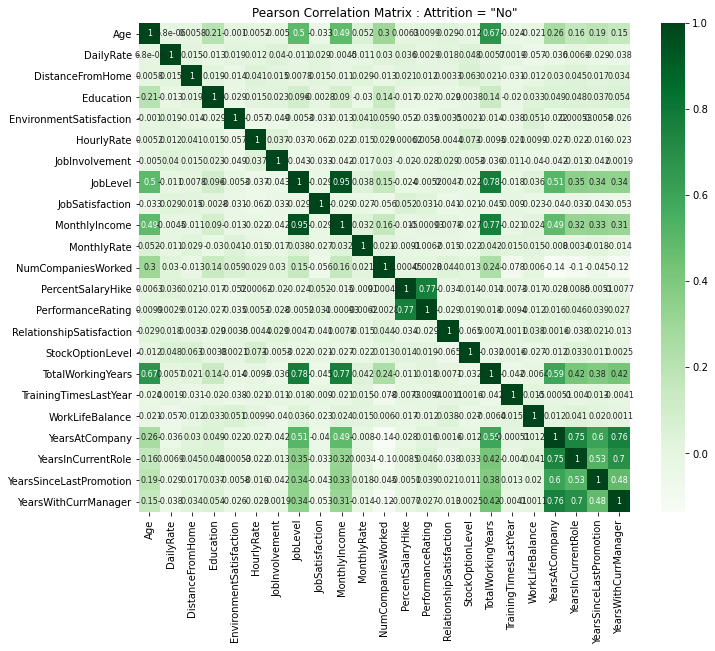

In [179]:
# Plot Pearson correlation matrix  for Attrition = "No"
fig_1 = plt.figure(figsize=(11, 9)) 
correlations = df_Attrition_No.corr() 

sns.heatmap(correlations, annot=True, cmap='Greens', annot_kws={'size': 8}) 
plt.title('Pearson Correlation Matrix : Attrition = "No"') 
plt.show()

In [180]:
# Get a series of unique values in column 'Department' of the dataframe
uniqueValues = df_start['Department'].unique()

print('Unique elements in column "Department" ')
print(uniqueValues)

Unique elements in column "Department" 
['Sales' 'Research & Development' 'Human Resources']


In [181]:
# Get a series of unique values in column 'EducationField' of the dataframe
uniqueValues = df_start['EducationField'].unique()

print('Unique elements in column "EducationField" ')
print(uniqueValues)

Unique elements in column "EducationField" 
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


In [182]:
fig = px.density_heatmap(df_start, x="EducationField", y="MonthlyIncome", template="seaborn")
print("Heatmap Education Field & Monthly income")
fig.show()

Heatmap Education Field & Monthly income


In [183]:
fig = px.histogram(df_start, x="EducationField", y="MonthlyIncome", color="Attrition",
            title="Attrition per department & monthly income",
            width=600, height=400,
            labels={"Attrition": "Yes/No",  "EducationField": "Education Field", "MonthlyIncome": "Income"},
            category_orders={"Department": ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'], "Attrition": ["Yes", "No"]},
            color_discrete_map={"Yes": "RebeccaPurple", "No": "MediumPurple"},
            template="simple_white"
            )

fig.update_yaxes( # the y-axis is in dollars
    tickprefix="$", showgrid=True
)

fig.update_layout( # customize font and legend orientation & position
    legend=dict(
        title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center"
    )
)


fig.add_annotation( # add a text callout with arrow
    text="least", x="Human Resources", y=400, arrowhead=1, showarrow=True
)

fig.show()

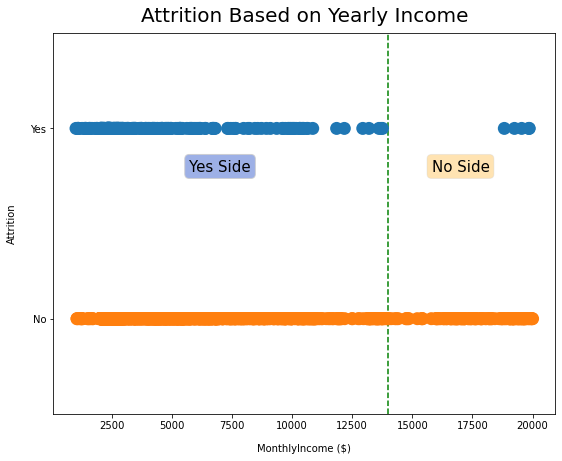

In [184]:
#Visual Derivation of Logistic Regression Equation
#Let's continue with the example. We'll utilize a single feature, monthly income, and two class labels of Attrition "Yes" and "No".

plt.figure(figsize=(9, 7))

ax = sns.stripplot(data=df_start, x="MonthlyIncome", y="Attrition", jitter=False, size=13)

plt.xlabel("MonthlyIncome ($)", labelpad=13)
plt.ylabel("Attrition", labelpad=13)
plt.title("Attrition Based on Yearly Income", y=1.015, fontsize=20)

plt.axvline(x=14000, linestyle="--", color='green')

bbox_props_No = dict(boxstyle="round", fc="#859ce0", ec="0.8", alpha=0.8)
ax.text(7000, 0.2, "Yes Side", ha="center", va="center", size=15, bbox=bbox_props_No)
bbox_props_Yes = dict(boxstyle="round", fc="orange", ec="0.8", alpha=0.3)
ax.text(17000, 0.2, "No Side", ha="center", va="center", size=15, bbox=bbox_props_Yes)

ax = plt.gca()


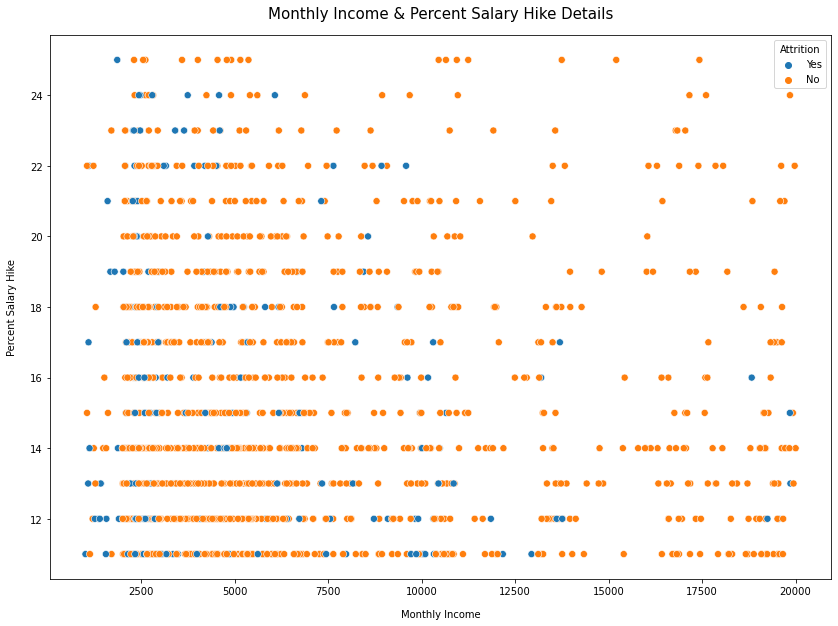

In [185]:
#Visualize two features and two class labels.

plt.figure(figsize=(14, 10))
sns.scatterplot(x='MonthlyIncome', y='PercentSalaryHike', hue='Attrition', data=df_start, s=50)

plt.title("Monthly Income & Percent Salary Hike Details", y=1.02, fontsize=15)
plt.xlabel("Monthly Income", labelpad=13)
plt.ylabel("Percent Salary Hike", labelpad=13)

ax = plt.gca()

In [186]:
df_Attrition_Yes_Income_high = df_Attrition_Yes[df_start['MonthlyIncome']>17000]
df_Attrition_Yes_Income_high

<ipython-input-186-e2cb599bbf25>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,2,Female,...,3,4,0,23,0,3,22,15,15,8
568,55,Yes,Travel_Rarely,725,Research & Development,2,3,Medical,4,Male,...,3,4,1,24,2,3,5,2,1,4
595,58,Yes,Travel_Rarely,286,Research & Development,2,4,Life Sciences,4,Male,...,3,4,0,40,2,3,31,15,13,8
749,52,Yes,Travel_Rarely,266,Sales,2,1,Marketing,1,Female,...,3,4,1,33,3,3,32,14,6,9
913,45,Yes,Travel_Rarely,1449,Sales,2,3,Marketing,1,Female,...,3,1,0,26,2,3,24,10,1,11


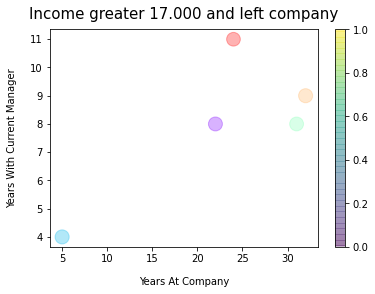

In [187]:
data = df_Attrition_Yes_Income_high
x = data['YearsAtCompany']
y = data['YearsWithCurrManager']
colors = cm.rainbow(np.linspace(0, 1, len(y)))
sizes = 0.0100 * data['MonthlyIncome']


plt.title("Income greater 17.000 and left company", y=1.02, fontsize=15)
plt.xlabel("Years At Company", labelpad=13)
plt.ylabel("Years With Current Manager", labelpad=13)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar(); 


In [188]:
df_Attrition_Yes_Income_low = df_Attrition_Yes[df_start['MonthlyIncome']<17000]
df_Attrition_Yes_Income_low

<ipython-input-188-af8f4b89a927>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,...,3,2,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,...,4,2,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,...,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,4,Male,...,3,1,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,Male,...,3,2,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,4,Male,...,3,4,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,2,Male,...,3,4,2,12,3,3,6,3,0,1


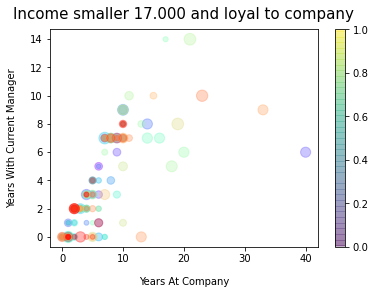

In [189]:
data = df_Attrition_Yes_Income_low
x = data['YearsAtCompany']
y = data['YearsWithCurrManager']
colors = cm.rainbow(np.linspace(0, 1, len(y)))
sizes = 0.0100 * data['MonthlyIncome']

plt.title("Income smaller 17.000 and loyal to company", y=1.02, fontsize=15)
plt.xlabel("Years At Company", labelpad=13)
plt.ylabel("Years With Current Manager", labelpad=13)


plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar(); 

In [219]:
# import raw dataset
df_numerical = pd.read_csv("./data/raw.csv")

df_numerical_selected = pd.DataFrame(df_numerical,
                  columns=["Department", "YearsAtCompany","RelationshipSatisfaction","EnvironmentSatisfaction", "WorkLifeBalance","YearsWithCurrManager","PerformanceRating"])



In [224]:
fig = px.parallel_coordinates(df_numerical_selected, color="YearsAtCompany", labels={"RelationshipSatisfaction": "Relationship Satisfaction",
                  "EnvironmentSatisfaction": "Environment Satisfaction", "WorkLifeBalance": "WorkLife Balance",
                  "YearsWithCurrManager": "Years With Current Manager", "PerformanceRating": "Performance Rating"},
                    color_continuous_scale='Inferno')
fig.show()

In [248]:
df_numerical_selected2 = pd.DataFrame(df_numerical,
                  columns=["Department","RelationshipSatisfaction","EducationField","EnvironmentSatisfaction","YearsAtCompany"])


In [249]:
fig = px.parallel_categories(df_numerical_selected2, color="EnvironmentSatisfaction", color_continuous_scale='Inferno')
fig.show()